Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.
Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values
(try a grid search on the weights and n_neighbors hyperparameters).

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# import MNIST dataset
from sklearn.datasets import load_digits
mnist = load_digits()
print(f"MNIST dataset's type: {type(mnist)}")
print(f'Keys od mnist dataset:\n{list(mnist.keys())}')

MNIST dataset's type: <class 'sklearn.utils.Bunch'>
Keys od mnist dataset:
['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']


In [33]:
# filling mnist.data into pandas dataframe
data = pd.DataFrame(mnist.data)
print('Shape of data: ', data.shape)
data.head(3)

Shape of data:  (1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [34]:
# mnist.target
target = mnist.target
print('Shape: ', target.shape)
print('Values: ', target)

Shape:  (1797,)
Values:  [0 1 2 ... 8 9 8]


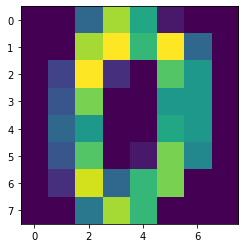

In [35]:
# show the first image of target
plt.imshow(mnist.images[0])


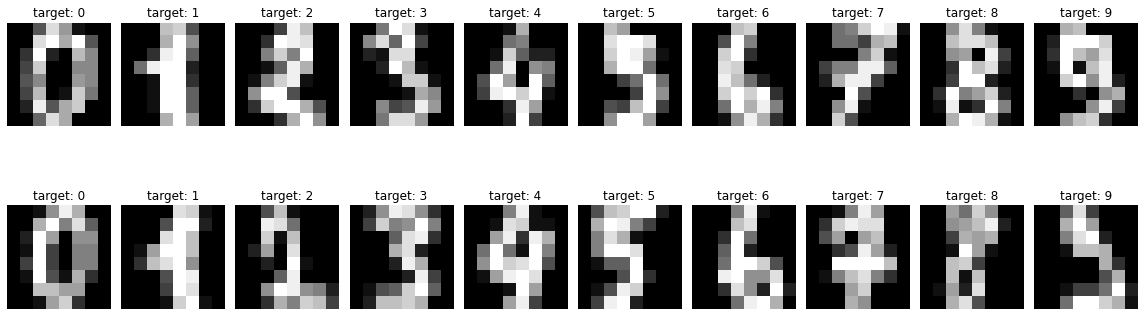

In [36]:
# show the images of al targets in 20 subplots with 2 rows
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")

plt.tight_layout()

In [37]:
# Setting features and labels for traing data
X = data
y = target

# printing shapes for being sure the shapes are acceptable
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [38]:
# splitting data through train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [39]:
# Now using GridSearch and finding best params for the further predictions
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

k_range = range(1, 31)
weight_options = ['uniform', 'distance']
grid_params = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn,
                    param_grid=grid_params,
                    cv=10,
                    scoring='f1_weighted')

In [40]:
# train data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [41]:
# checkin for best params
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9881111731253865
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier()


In [42]:
# using best parameters to make predictions
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [43]:
from sklearn import metrics

# evaluate model through metrics
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print(f'Precision-score: {precision}')

recall = metrics.recall_score(y_test, y_pred, average='weighted')
print(f'Recall-score: {recall}')

f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1_score}')

Precision-score: 0.9874169040835707
Recall-score: 0.9861111111111112
F1-score: 0.9862183786166899


In [44]:
# estimate probability for making possible to count roc_auc_score for multiclass classification
y_pred_prob = knn.predict_proba(X_test)

roc_auc_score = metrics.roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC_AUC_score: {roc_auc_score}')

ROC_AUC_score: 0.996632124027532


In [45]:
# comparing actual and predicted values in dataframe
actual_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_pred_df


,Actual,Predicted
0,6,1
1,7,7
2,0,0
3,5,5
4,3,3
...,...,...
355,8,8
356,5,5
357,4,4
358,3,3


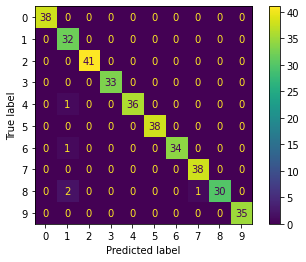

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)